# MOCHAMMAD RIVAN AKHSA
# Capstone 3 - Machine Learning- Hotel Booking Demmand

# CONTEXT

## Latar Belakang
Dalam industri layanan, pemahaman terhadap perilaku pelanggan sangat penting untuk meningkatkan tingkat kepuasan dan efisiensi operasional. Salah satu tantangan yang sering dihadapi adalah ketidakpastian terkait dengan pembatalan booking yang dilakukan oleh pelanggan. Pembatalan booking dapat menyebabkan kerugian finansial serta gangguan pada perencanaan operasional perusahaan.

Dengan adanya data historis yang mengandung informasi mengenai karakteristik pelanggan, riwayat booking, serta faktor-faktor lain yang relevan, perusahaan dapat menggunakan model prediktif untuk mengidentifikasi kemungkinan pembatalan booking oleh pelanggan. Oleh karena itu, tujuan dari penelitian ini adalah untuk mengembangkan model machine learning yang dapat memprediksi apakah seorang pelanggan akan membatalkan booking atau tidak, berdasarkan fitur-fitur yang tersedia.

## Rumusan Masalah

Bagaimana model Machine Learning dapat dimanfaatkan untuk memprediksi pembatalan pemesanan dengan akurat, dan strategi berbasis data apa yang dapat diterapkan untuk mengoptimalkan pendapatan serta meminimalkan risiko kamar kosong?

## Tujuan
- Membangun Model Prediktif: Mengembangkan model machine learning yang dapat memprediksi kemungkinan pembatalan reservasi berdasarkan fitur-fitur yang tersedia.

- Optimasi F2-score: Memastikan model memiliki recall yang tinggi untuk mendeteksi sebanyak mungkin kasus pembatalan, sambil tetap menjaga precision yang memadai.

- Identifikasi Faktor Penting: Menganalisis fitur-fitur yang paling berpengaruh terhadap keputusan pembatalan reservasi, sehingga hotel dapat mengambil tindakan pencegahan yang tepat.

## Manfaat
- Mengurangi Dampak Pembatalan: Dengan memprediksi pembatalan, hotel dapat mengoptimalkan manajemen kamar dan sumber daya lainnya.

- Meningkatkan Kepuasan Pelanggan: Meminimalkan overbooking dan underbooking akan meningkatkan pengalaman pelanggan.

- Efisiensi Operasional: Prediksi yang akurat akan membantu hotel dalam perencanaan dan alokasi sumber daya yang lebih efektif.

## Metric Evaluation
**Target (y)**

- 0: Tidak Cancel
- 1: Cancel

**Type 1 error: False Positive (model meprediksi booking dibatalkan, kenyataanya booking tidak dibatalkan).**

Konsekuensi:

Penyusutan pendapatan: Hotel mungkin akan mengambil tindakan berdasarkan prediksi yang salah, seperti menyiapkan kamar cadangan atau melakukan perubahan pada perencanaan yang mengurangi efisiensi operasional.

Pemborosan sumber daya: Jika hotel mengalokasikan kamar cadangan untuk pelanggan yang tidak jadi membatalkan, ini bisa menyebabkan kerugian dan ketidakefisienan dalam pemanfaatan kamar hotel.

**Type 2 error: False Negative (model memprediksi booking tidak dibatalkan, kenyataanya booking dibatalkan)**

Konsekuensi:

Kehilangan pendapatan: Hotel tidak siap untuk pembatalan dan kehilangan kesempatan untuk memesan kamar kepada pelanggan lain.

Gangguan operasional: Jika hotel sudah mempersiapkan kamar untuk pelanggan yang akhirnya membatalkan, ini bisa menyebabkan kerugian pendapatan, serta mengganggu perencanaan operasional.

**Pemilihan Metrik**
Menurut saya, meskipun kedua jenis kesalahan prediksi merugikan namun bobot kerugian lebih besar kepada false negative. Karena ketika model memprediksi booking tidak dibatalkan namun ternyata dibatalkan, pihak hotel akan mendapat kerugian yang besar secara finansial yaitu kerugian kamar yang menjadi kosong dan kehilangan peluang untuk menjual kamar tersebut pada orang lain. Oleh karena itu, untuk mengukur performa model, saya akan lebih mengutamakan F2-score (karena recall lebih penting daripada precision) dan ROC AUC score untuk meminimalisir false negative.


## Data Understanding
- country: Negara asal pelanggan.
- market_segment: Penunjukan segmen pasar.
- previous_cancellations: Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini.
- booking_changes: Jumlah perubahan/amandemen yang dilakukan pada pemesanan sejak pemesanan dimasukkan ke dalam sistem hingga saat check-in atau pembatalan.
- deposit_type: Indikasi apakah pelanggan telah membayar deposit untuk menjamin pemesanan.
- days_in_waiting_list: Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan.
- customer_type: Jenis pemesanan.
- reserved_room_type: Kode tipe kamar yang dipesan. Kode ini digunakan untuk menjaga kerahasiaan dan anonim.
- required_car_parking_space: Jumlah ruang parkir mobil yang dibutuhkan oleh pelanggan.
-total_of_special_request: Jumlah permintaan khusus yang dibuat oleh pelanggan (misalnya, tempat tidur twin atau lantai atas).
- is_canceled: Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0)

## 1. Import Libraries

In [352]:

# pip install lightgbm


In [353]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
import scipy.stats as stats
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.metrics import classification_report, fbeta_score, make_scorer
import xgboost as xgb
import lightgbm as lgb

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## 2. Data

## 2.1 Load Data

In [354]:
df=pd.read_csv('data_hotel_booking_demand.csv')
df.tail()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
83572,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1


## 2.2 Pemahaman data dengan statistik deskriptif

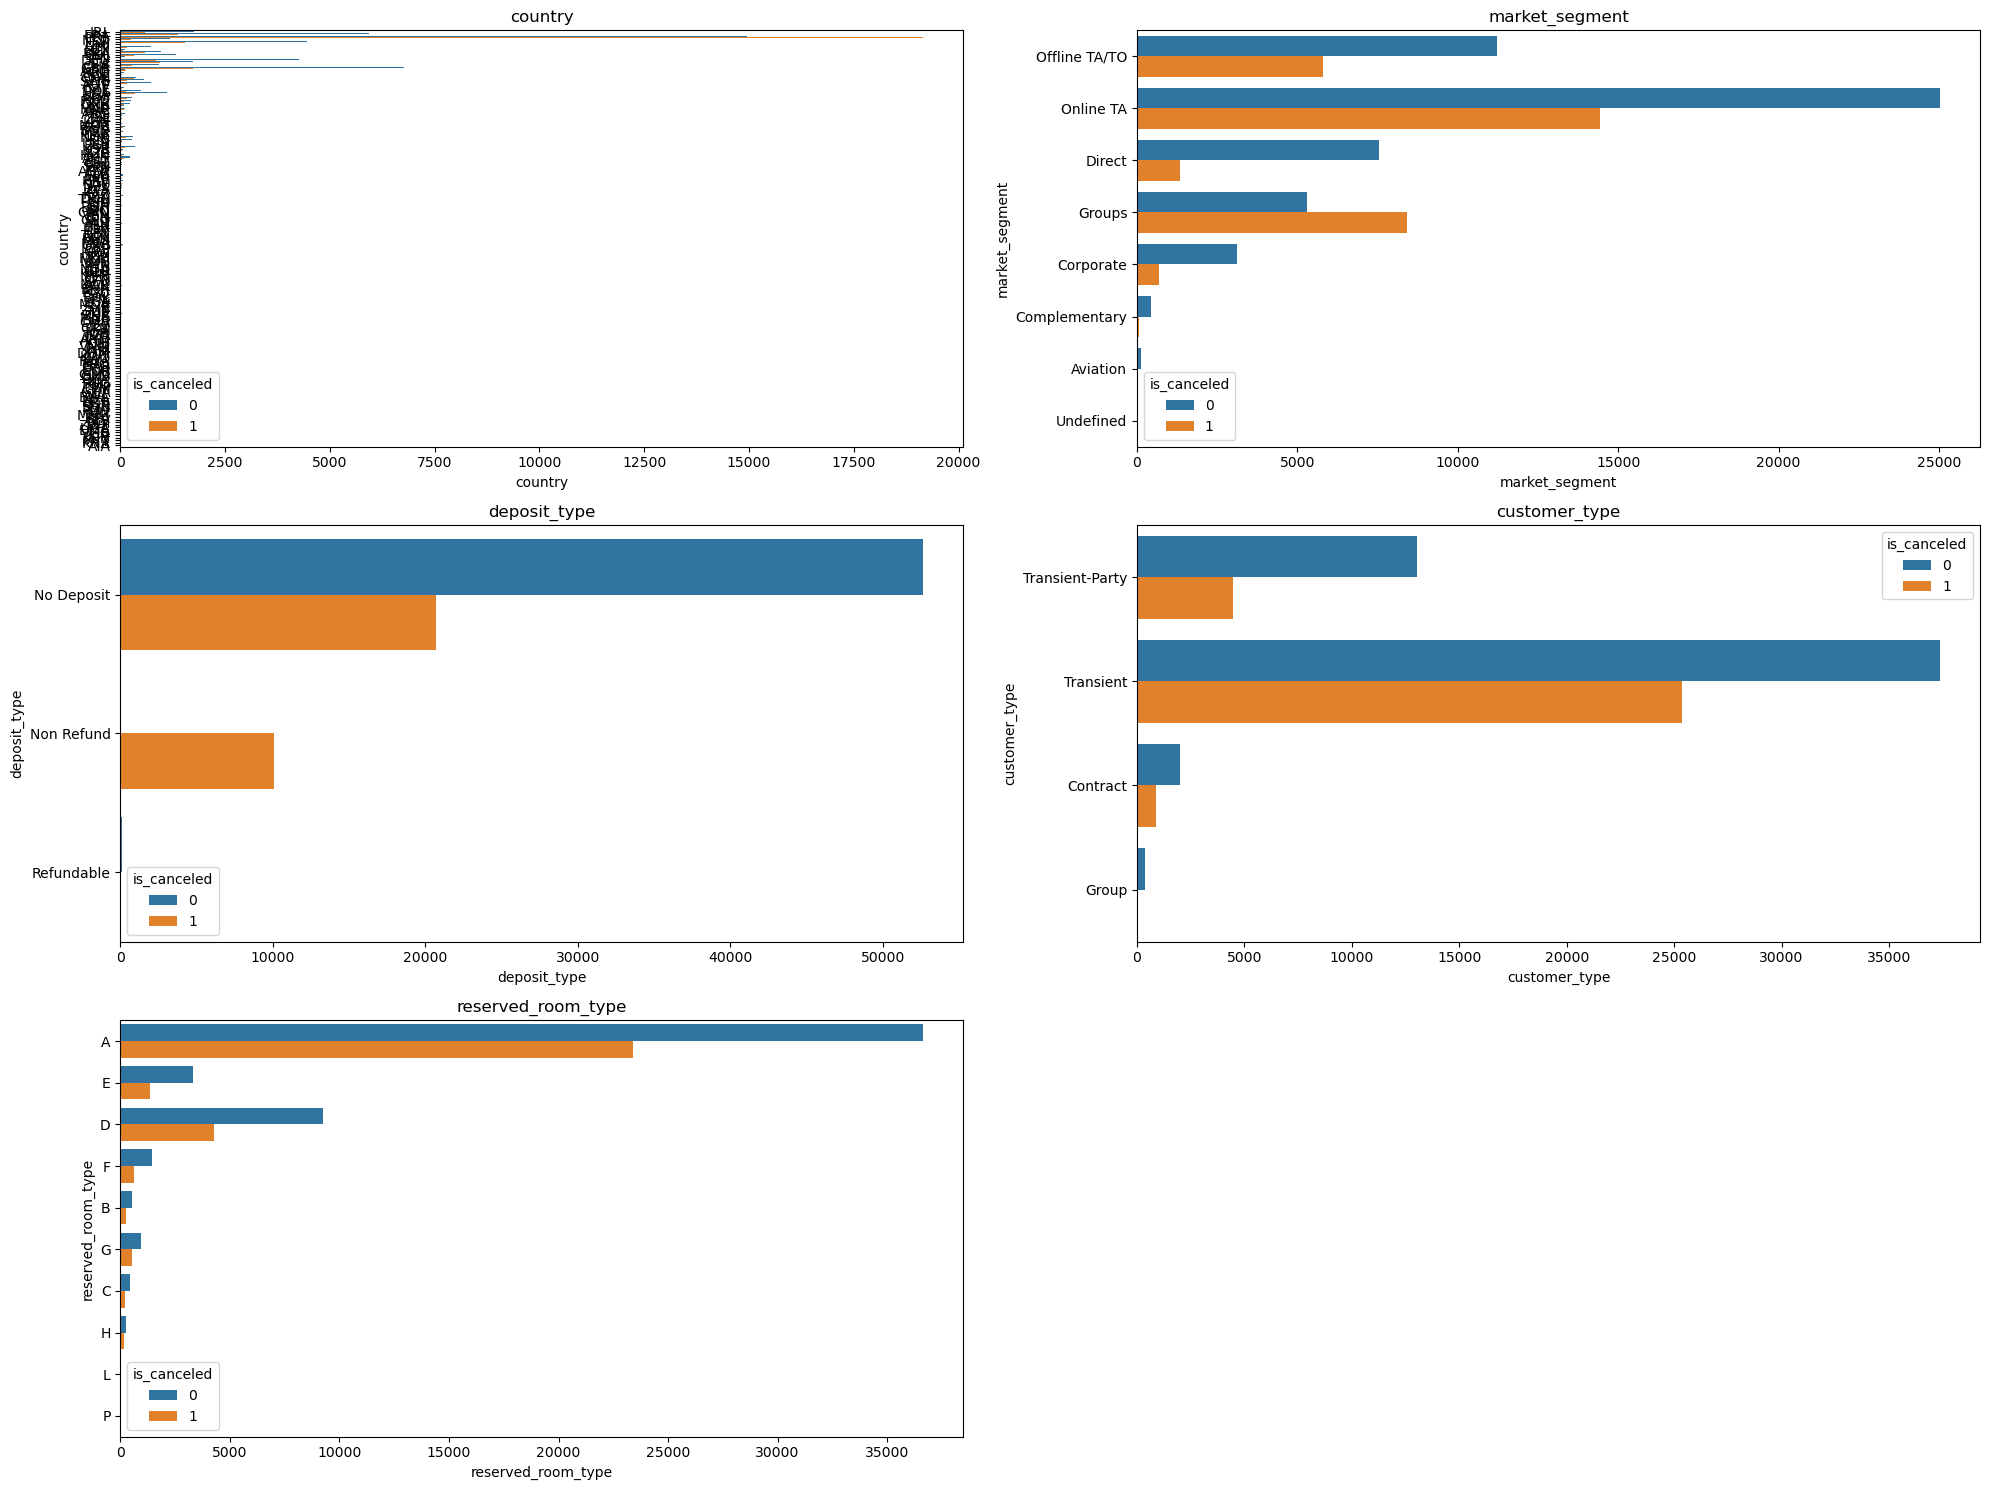

In [355]:
features = df.select_dtypes(exclude= 'number')
plt.figure(figsize=(20, 15))
plotnumber = 1

for feature in features:
    ax = plt.subplot(3, 2, plotnumber)
    sns.countplot(y=feature, hue='is_canceled', data=df)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout()
    
plt.show()

**Insight**

- `country` vs pembatalan: Sebagian besar data berasal dari beberapa negara yang sama, dengan jumlah pemesanan yang sangat besar. Namun, pembatalan (is_canceled = 1) tampaknya lebih sering terjadi pada pemesanan dari negara tertentu.

- `market_segment` vs pembatalan: Pemesanan yang berasal dari segmen Online TA dan Offline TA/TO menunjukkan tingkat pembatalan yang lebih tinggi dibandingkan dengan segmen lainnya. Segmen seperti Corporate dan Groups menunjukkan lebih sedikit pembatalan.

- `deposit_type` vs pembatalan: Pemesanan dengan tipe deposit No Deposit memiliki jumlah pembatalan yang jauh lebih tinggi dibandingkan dengan tipe deposit lainnya. Pemesanan dengan deposit refundable dan non-refundable lebih jarang dibatalkan.

- `customer_type` vs pembatalan: Pemesanan oleh Transient (tamu yang datang untuk waktu singkat) menunjukkan tingkat pembatalan yang sangat tinggi, sementara Transient-Party memiliki tingkat pembatalan yang sedikit lebih rendah. Contract dan Group menunjukkan tingkat pembatalan yang sangat rendah.

- `reserved_room_type` vs pembatalan: Tipe kamar A memiliki jumlah pemesanan yang sangat tinggi, diikuti oleh tipe kamar E dan D, namun tipe kamar A juga menunjukkan jumlah pembatalan yang lebih tinggi dibandingkan dengan tipe kamar lainnya.

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


**Insight**
- **Total baris data**: Dataset memiliki 83.573 entri (baris).
- **Kolom data**: Terdapat 11 kolom dalam dataset, dengan 6 kolom bertipe data numerik (int64) dan 5 kolom bertipe objek (object).
- **Keterisian data**: Semua kolom memiliki data yang lengkap (non-null), dengan jumlah entri non-null yang sama untuk setiap kolom.

In [357]:
for column in df.columns:
    print(f"Column: {column}")
    print(f"Value counts:\n{df[column].value_counts()}\n")

Column: country
Value counts:
country
PRT    34097
GBR     8495
FRA     7307
ESP     5996
DEU     5116
       ...  
ZMB        1
LCA        1
SYC        1
GLP        1
AIA        1
Name: count, Length: 162, dtype: int64

Column: market_segment
Value counts:
market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: count, dtype: int64

Column: previous_cancellations
Value counts:
previous_cancellations
0     79060
1      4207
2        86
3        46
24       33
11       28
6        19
4        19
26       18
25       17
19       12
13       10
14       10
5         7
21        1
Name: count, dtype: int64

Column: booking_changes
Value counts:
booking_changes
0     70873
1      8963
2      2652
3       639
4       260
5        90
6        39
7        23
8        10
10        5
9         4
13        4
17        2
12        2
14        2
16     

In [358]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [359]:
df.isna().sum()/len(df)*100

country                        0.419992
market_segment                 0.000000
previous_cancellations         0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
reserved_room_type             0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
is_canceled                    0.000000
dtype: float64

**Intepretasi** : 
- Terdapat 351 kolom kosong pada kolom **country**, dimana sekitar 0.42% dari data pada kolom **country**.

In [360]:
df.duplicated().sum()

73371

In [361]:
df.duplicated().sum()/len(df)*100

87.79270817129934

**Intepretasi**: 
- Jumlah duplikat (73371) menunjukkan banyaknya baris yang memiliki kesamaan dengan baris lainnya di dataset.
- Persentase duplikat (87.79%) menunjukkan bahwa lebih dari 87% data terdiri dari baris-baris yang terduplikat.
- Namun, dikarenakan jumlah data duplikat yang signifikan dan tidak terdapat unique identifier seperti tanggal atau ID, sehingga kolom tidak di drop karena dapat diasumsikan booking yang terduplikasi terjadi di lain hari.

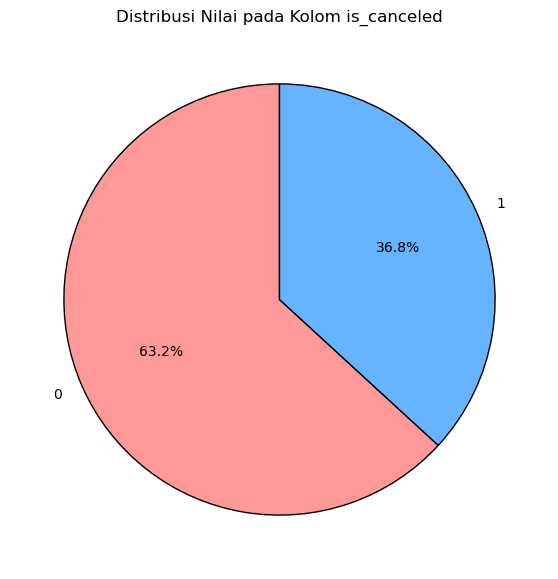

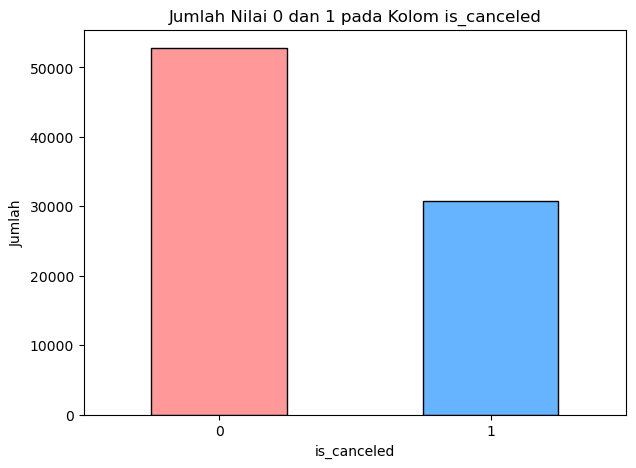

is_canceled
0    52795
1    30778
Name: count, dtype: int64

In [362]:
Jumlah_0_1= df['is_canceled'].value_counts()

# Membuat pie chart
plt.figure(figsize=(7, 7))
Jumlah_0_1.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], wedgeprops={'edgecolor': 'black'})

# Menambahkan judul
plt.title('Distribusi Nilai pada Kolom is_canceled')

# Menampilkan pie chart
plt.ylabel('')  # Menyembunyikan label y
plt.show()

value_counts = df['is_canceled'].value_counts()

# Membuat bar chart
plt.figure(figsize=(7, 5))
value_counts.plot(kind='bar', color=['#ff9999', '#66b3ff'], edgecolor='black')

# Menambahkan judul dan label
plt.title('Jumlah Nilai 0 dan 1 pada Kolom is_canceled')
plt.xlabel('is_canceled')
plt.ylabel('Jumlah')

# Menampilkan bar chart
plt.xticks(rotation=0)  # Menjaga label pada sumbu x tetap horizontal
plt.show()
value_counts

**Insight**

- 36.8% dari pemesanan dibatalkan (1), sementara 63.2% tidak dibatalkan (0).
Proporsi pemesanan yang dibatalkan cukup signifikan, yang menunjukkan bahwa pembatalan adalah masalah yang perlu diperhatikan lebih lanjut dalam analisis.
Jumlah Nilai 0 dan 1 pada Kolom is_canceled (Bar Chart):

- Terdapat 52,795 pemesanan yang tidak dibatalkan (nilai 0) dan 30,778 pemesanan yang dibatalkan (nilai 1).
Meskipun lebih banyak pemesanan yang tidak dibatalkan, jumlah pembatalan yang terjadi tetap cukup tinggi (sekitar 37% dari total pemesanan).

## 2.3 Data cleaning

In [363]:
df.drop(columns=['country'], inplace=True)

**Insight**:

- Berdasarkan sumber dari jurnal (https://www.sciencedirect.com/science/article/pii/S2352340918315191), ditemukan bahwa pada data ini terdapat banyak nilai unik (162 negara) dan sebagian besar data berasal dari Portugal (40,79%), sehingga menggunakan binary encoding akan menghasilkan banyak fitur yang sulit diinterpretasikan. Dengan demikian, kolom country dapat di-drop dan digantikan dengan kategori yang lebih sederhana dan bermakna.


In [364]:
df.head()

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [365]:
df.head()

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [366]:
dropped_col= ['market_segment', 'deposit_type','customer_type', 'reserved_room_type','is_canceled']
data= df.copy()
data.drop(dropped_col, axis = 1, inplace = True)
data.head()


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0,0,0,0,0
1,0,0,0,0,2
2,0,1,0,0,2
3,0,0,0,0,1
4,0,2,0,0,2


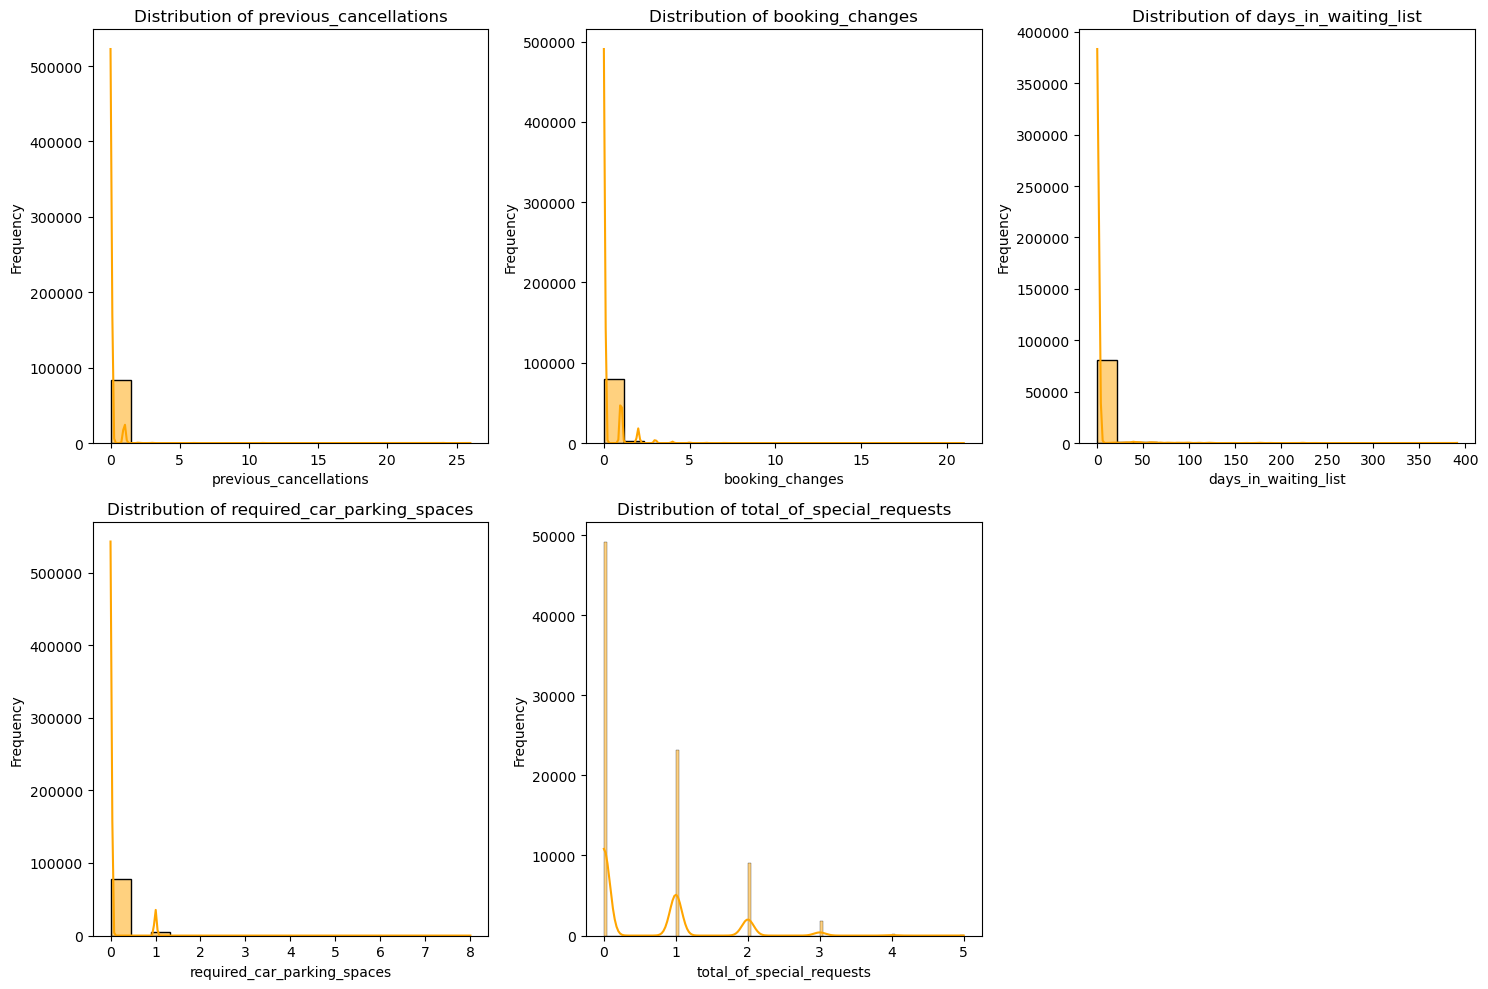

{'previous_cancellations': 7.685820629397432e-177,
 'booking_changes': 3.683225400198562e-163,
 'days_in_waiting_list': 5.035407909416679e-175,
 'required_car_parking_spaces': 4.041510891302819e-169,
 'total_of_special_requests': 3.811684020827647e-138}

In [367]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)  # Creating subplots
    sns.histplot(data[feature], kde=True, color='orange')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
normality_results = {}
for feature in data.columns:
    stat, p_value = stats.shapiro(data[feature])
    normality_results[feature] = p_value

normality_results  # Display p-values for normality tests

## 2.4 Correlation Heatmap

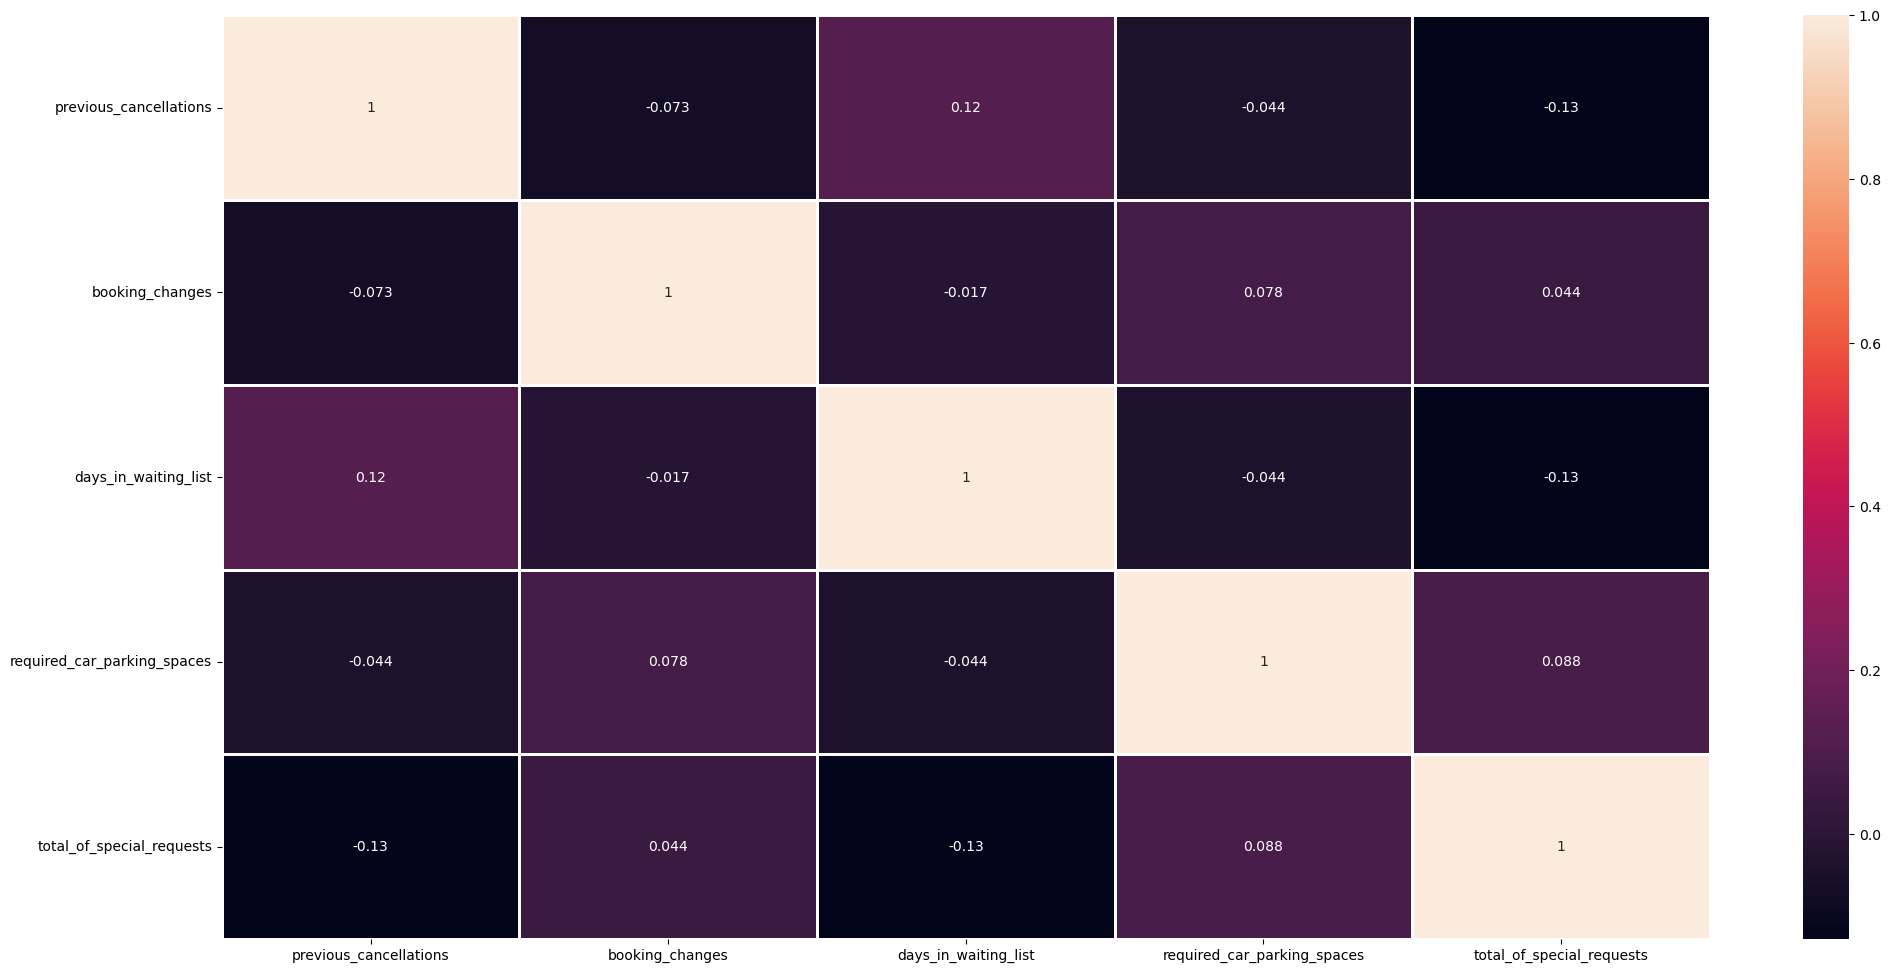

In [368]:
# Compute Spearman correlation
spearman_corr = data.corr(method='spearman')

# Visualize the Spearman correlation heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(spearman_corr, annot=True, linewidths=1)
plt.show()

**Insight**

- **Alasan pemilihan Spearman:**

Setelah melihat distribusi pada kolom numerikal, terlihat bahwa persebaran data tidak normal. Maka korelasi Spearman digunakan.

- **Nilai Korelasi:**

Korelasi antara previous_cancellations dan booking_changes adalah 0.12, yang menunjukkan hubungan sangat lemah.
Korelasi antara days_in_waiting_list dan previous_cancellations adalah 0.12, yang juga menunjukkan korelasi yang sangat lemah.
Korelasi antara total_of_special_requests dan previous_cancellations adalah -0.13, yang berarti ada hubungan negatif yang sangat lemah.
Korelasi yang lebih tinggi terlihat antara required_car_parking_spaces dan total_of_special_requests dengan nilai 0.088, namun ini juga sangat rendah dan tidak signifikan.

- **Interpretasi Multikolinearitas (Multicollinearity):**

Berdasarkan matriks korelasi ini, tidak ada hubungan yang sangat kuat di antara variabel-variabel yang ditampilkan. Sebagai contoh, korelasi > 0.8 atau < -0.8 tidak ditemukan, yang mengindikasikan bahwa tidak ada multikolinearitas yang tinggi. Multikolinearitas terjadi ketika dua atau lebih variabel independen dalam model regresi sangat berkorelasi satu sama lain, dan ini bisa merusak interpretasi model. Dalam hal ini, karena semua korelasi berada di bawah 0.3 (baik positif atau negatif), multikolinearitas tidak terlihat menjadi masalah besar, **sehingga tidak ada kolom yang di drop**.

## 2.5 Encoding

In [369]:

# Defining the columns to encode
categorical_columns = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']

# Create the OneHotEncoder inside a column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # This will keep the other columns like  unchanged
)

# Fit and transform the data using the ColumnTransformer
encoded_data = column_transformer.fit_transform(df)

# Convert the transformed data back to DataFrame for easier viewing
encoded_df = pd.DataFrame(encoded_data, columns=column_transformer.get_feature_names_out())

# Display the result
print(encoded_df.head())

   onehot__market_segment_Complementary  onehot__market_segment_Corporate  \
0                                   0.0                               0.0   
1                                   0.0                               0.0   
2                                   0.0                               0.0   
3                                   0.0                               0.0   
4                                   0.0                               0.0   

   onehot__market_segment_Direct  onehot__market_segment_Groups  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   onehot__market_segment_Offline TA/TO  onehot__market_segment_Online TA  \
0                                   1.0                  

**Insight**:

- **Mengatasi Data Kategorikal:**

Kolom seperti market_segment, deposit_type, dan customer_type adalah kolom kategorikal yang tidak bisa langsung digunakan dalam model machine learning, seperti regresi atau Decision Tree, yang membutuhkan data numerik. Oleh karena itu, OneHotEncoder digunakan untuk mengubah nilai kategori tersebut menjadi format numerik yang dapat diproses oleh model.

- **Menjaga Informasi Kategori:**

Dengan menggunakan OneHotEncoder, kita dapat mengubah setiap kategori menjadi fitur terpisah, memastikan bahwa model dapat belajar dari setiap kategori dengan cara yang lebih jelas dan tidak terpengaruh oleh urutan atau ordinalitas.

- **Interpretasi**
One hot encoder lebih mudah di intepretasikan.

## 2.6 Data Split

In [370]:
# Menentukan fitur (X) dan target (y)
X = df[['previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'market_segment', 'deposit_type', 'customer_type', 
                        'reserved_room_type', 'days_in_waiting_list']]

# .drop('is_canceled', axis=1)  # Anggap kolom target bernama 'is_canceled'
y = df['is_canceled']

# Split data ke train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Splitting data dilakukan memisahkan data menjadi data pelatihan (untuk melatih model) dan data test (untuk melakukan testing performa model). 

- test_size= 0.2 dilakukan agar memisahkan 20% dari data akan digunakan untuk pengujian (testing set), dan 80% sisanya untuk pelatihan (training set). 

- Model perlu dilatih pada sebagian data (training set) dan diuji pada bagian lain yang tidak dilihat sebelumnya (testing set) untuk memastikan bahwa model tidak hanya menghafal data pelatihan, tetapi juga dapat menggeneralisasi ke data baru.

# 3. Modelling

Pada bagian ini, modelling akan dilakukan untuk melihat metrik evaluasi **precision**, **recall**, **f1-Score**, **support**, dan **f2-Score**. Namun fokus akan terletak pada **f2-Score**.
- Precision: Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan seluruh prediksi positif.
- Recall: mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan seluruh kasus positif yang sebenarnya.
- F1-Score: adalah rata-rata harmonis antara precision dan recall, memberikan nilai yang seimbang antara keduanya.
- F2-Score: adalah varian dari F1-Score yang lebih menekankan pada recall dibandingkan precision.


**Model yang akan dibandingkan** pada bagian ini adalah:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost
- LGBM

Pada setiap model dilakukan:

**ColumnTransformer**

- Menggunakan **OneHotEncoder** untuk mengonversi kolom kategorikal menjadi format numerik.
- Menggunakan **RobustScaler** untuk fitur numerik agar lebih tahan terhadap outliers.

**Pipeline**

- Menggunakan **SMOTE** untuk menangani ketidakseimbangan kelas.
- Menambahkan **SelectKBest** untuk memilih fitur yang paling relevan setelah proses encoding dan scaling.
- **RobustScaler** digunakan pada fitur numerik yang ada, memastikan data lebih robust terhadap nilai ekstrim dan membuat model lebih stabil.

## 3.1 Logistic Regression

In [375]:
# Definisikan fitur numerik dan kategorikal
numeric_features = ['previous_cancellations', 'booking_changes', 
                    'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list']
categorical_features = ['market_segment', 'deposit_type', 'customer_type', 
                        'reserved_room_type']

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputasi nilai hilang
    ('scaler', RobustScaler())  # Menggunakan RobustScaler untuk scaling numerik
])

# Preprocessing untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputasi nilai hilang
    ('encoder',OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False))  # Binary Encoding untuk kategorikal
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),        # Transformer untuk fitur numerik
        ('cat', categorical_transformer, categorical_features),  # Transformer untuk fitur kategorikal
    ],
    remainder='passthrough'  # Kolom yang tidak tercakup dalam transformers akan diteruskan tanpa perubahan
)

# Model yang akan diuji (hanya Logistic Regression)
model = LogisticRegression(random_state=42)

# Membuat pipeline untuk model dengan preprocessing dan SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=.5), threshold='mean', max_features=25)),
    ('smote', SMOTE(random_state=42)),  # SMOTE untuk menangani imbalance
    ('classifier', model)  # Menggunakan model Logistic Regression
])

# Fit pipeline ke data latih (X_train, y_train)
pipeline.fit(X_train, y_train)

# Evaluasi model pada data uji
y_pred = pipeline.predict(X_test)

# Menampilkan laporan klasifikasi untuk Logistic Regression
print("Evaluating Logistic Regression")
print(classification_report(y_test, y_pred))

# Menghitung F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score for Logistic Regression: {f2:.4f}")

print("-" * 80)  # Separator

Evaluating Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.73      0.78     10601
           1       0.61      0.75      0.67      6114

    accuracy                           0.73     16715
   macro avg       0.72      0.74      0.72     16715
weighted avg       0.75      0.73      0.74     16715

F2 Score for Logistic Regression: 0.7142
--------------------------------------------------------------------------------


## 3.2. Decision Tree

In [ ]:
# Definisikan fitur numerik dan kategorikal
numeric_features = ['previous_cancellations', 'booking_changes', 
                    'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list']
categorical_features = [ 'market_segment', 'deposit_type', 'customer_type', 
                        'reserved_room_type']

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputasi nilai hilang
    ('scaler', RobustScaler())  # Menggunakan RobustScaler untuk scaling numerik
])

# Preprocessing untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputasi nilai hilang
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))  # Binary Encoding untuk kategorikal
])

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model yang akan diuji (hanya Decision Tree)
model = DecisionTreeClassifier(random_state=42)

# Membuat pipeline untuk model dengan preprocessing dan SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(DecisionTreeClassifier(), max_features=25)),
    ('smote', SMOTE(random_state=42)),  # SMOTE untuk menangani imbalance
    ('classifier', model)  # Menggunakan model Decision Tree
])

# Fit pipeline ke data latih (X_train, y_train)
pipeline.fit(X_train, y_train)

# Evaluasi model pada data uji
y_pred = pipeline.predict(X_test)

# Menampilkan laporan klasifikasi untuk Decision Tree
print("Evaluating Decision Tree")
print(classification_report(y_test, y_pred))

# Menghitung F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score for Decision Tree: {f2:.4f}")

print("-" * 80)  # Separator


Evaluating Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     10601
           1       0.76      0.63      0.69      6114

    accuracy                           0.79     16715
   macro avg       0.78      0.76      0.77     16715
weighted avg       0.79      0.79      0.79     16715

F2 Score for Decision Tree: 0.6501
--------------------------------------------------------------------------------


## 3.3. Random Forest

In [ ]:
# Definisikan fitur numerik dan kategorikal
numeric_features = ['previous_cancellations', 'booking_changes', 
                    'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list']
categorical_features = [ 'market_segment', 'deposit_type', 'customer_type', 
                        'reserved_room_type']

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputasi nilai hilang
    ('scaler', RobustScaler())  # Menggunakan RobustScaler untuk scaling numerik
])

# Preprocessing untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputasi nilai hilang
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))  # Binary Encoding untuk kategorikal
])

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model yang akan diuji (hanya Random Forest)
model = RandomForestClassifier(random_state=42)

# Membuat pipeline untuk model dengan preprocessing dan SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(RandomForestClassifier(), max_features=25)),
    ('smote', SMOTE(random_state=42)),  # SMOTE untuk menangani imbalance
    ('classifier', model)  # Menggunakan model Random Forest
])

# Fit pipeline ke data latih (X_train, y_train)
pipeline.fit(X_train, y_train)

# Evaluasi model pada data uji
y_pred = pipeline.predict(X_test)

# Menampilkan laporan klasifikasi untuk Random Forest
print("Evaluating Random Forest")
print(classification_report(y_test, y_pred))

# Menghitung F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score for Random Forest: {f2:.4f}")

print("-" * 80)  # Separator


Evaluating Random Forest
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     10601
           1       0.80      0.61      0.69      6114

    accuracy                           0.80     16715
   macro avg       0.80      0.76      0.77     16715
weighted avg       0.80      0.80      0.79     16715

F2 Score for Random Forest: 0.6433
--------------------------------------------------------------------------------


## 3.4. XGBoost

In [ ]:
# Definisikan fitur numerik dan kategorikal
numeric_features = ['previous_cancellations', 'booking_changes', 
                    'required_car_parking_spaces', 'total_of_special_requests','days_in_waiting_list']
categorical_features = [ 'market_segment', 'deposit_type', 'customer_type', 
                        'reserved_room_type']

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputasi nilai hilang
    ('scaler', RobustScaler())  # Menggunakan RobustScaler untuk scaling numerik
])

# Preprocessing untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputasi nilai hilang
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False))  # Binary Encoding untuk kategorikal
])

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = xgb.XGBClassifier(random_state=42)

# Membuat pipeline untuk model dengan preprocessing dan SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(xgb.XGBClassifier(random_state=42))),
    ('smote', SMOTE(random_state=42)),  # SMOTE untuk menangani imbalance
    ('classifier', model)  # Menggunakan model XGBoost
])

# Fit pipeline ke data latih (X_train, y_train)
pipeline.fit(X_train, y_train)

# Evaluasi model pada data uji
y_pred = pipeline.predict(X_test)

# Menampilkan laporan klasifikasi untuk XGBoost
print("Evaluating XGBoost")
print(classification_report(y_test, y_pred))

# Menghitung F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score for XGBoost: {f2:.4f}")

print("-" * 80)  # Separator


Evaluating XGBoost
              precision    recall  f1-score   support

           0       0.83      0.57      0.68     10601
           1       0.52      0.80      0.63      6114

    accuracy                           0.65     16715
   macro avg       0.67      0.68      0.65     16715
weighted avg       0.72      0.65      0.66     16715

F2 Score for XGBoost: 0.7188
--------------------------------------------------------------------------------


## 3.5. LGBM

In [ ]:

import lightgbm as lgb
print(lgb.__version__)
# Definisikan fitur numerik dan kategorikal
numeric_features = ['previous_cancellations', 'booking_changes', 
                    'required_car_parking_spaces', 'total_of_special_requests','days_in_waiting_list']
categorical_features = [ 'market_segment', 'deposit_type', 'customer_type', 
                        'reserved_room_type']

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),  # Imputasi nilai hilang
    ('scaler', RobustScaler())  # Menggunakan RobustScaler untuk scaling numerik
])

# Preprocessing untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputasi nilai hilang
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))  # Binary Encoding untuk kategorikal
])

# Membuat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model menggunakan LightGBM
model = lgb.LGBMClassifier(random_state=42)

# Membuat pipeline untuk model dengan preprocessing dan SMOTE
pipeline = ImbPipeline(steps=[ 
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(lgb.LGBMClassifier(random_state=42), max_features=25)),
    ('smote', SMOTE(random_state=42)),  # SMOTE untuk menangani imbalance
    ('classifier', model)  # Menggunakan model LightGBM
])

# Fit pipeline ke data latih (X_train, y_train)
pipeline.fit(X_train, y_train)

# Evaluasi model pada data uji
y_pred = pipeline.predict(X_test)

# Menampilkan laporan klasifikasi untuk LGBM
print("Evaluating LightGBM")
print(classification_report(y_test, y_pred))

# Menghitung F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score for LightGBM: {f2:.4f}")

print("-" * 80)  # Separator

4.5.0
[LightGBM] [Info] Number of positive: 24664, number of negative: 42194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 66858, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368901 -> initscore=-0.536933
[LightGBM] [Info] Start training from score -0.536933
[LightGBM] [Info] Number of positive: 42194, number of negative: 42194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 84388, number of used features: 7
[LightGBM] [Inf

# 4. Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# **Pipeline**: Preprocessing + SMOTE + Feature Selection + Model
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Preprocessing step (pastikan ini sudah didefinisikan)
    ("smote", SMOTE(random_state=42)),  # **SMOTE untuk menangani class imbalance**
    ("feature_selection", SelectFromModel(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=.5), threshold='mean', max_features=25)),  # **Mengurangi jumlah fitur yang dipilih**
    ('classifier', LogisticRegression(random_state=42))  # **Placeholder model**
])

# **Parameter Grid yang Lebih Sederhana**
param_grid = [
    # Logistic Regression
    {
        'classifier': [LogisticRegression(random_state=42, max_iter=500)],
        'classifier__C': [0.1, 1],  # **Hanya 2 pilihan**
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear'],
        'classifier__class_weight': ['balanced']
    },
    # Random Forest
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],  # **Kurangi pilihan estimator**
        'classifier__max_depth': [10, 20],  # **Kurangi pilihan max_depth**
        'classifier__min_samples_split': [2, 5],
        'classifier__class_weight': ['balanced']
    },
    # XGBoost
    {
        'classifier': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')],
        'classifier__n_estimators': [100, 200],  # **Kurangi pilihan estimator**
        'classifier__max_depth': [3, 6],
        'classifier__learning_rate': [0.05, 0.1]  # **Hapus 0.2 untuk percepatan**
    },
    # LightGBM
    {
        'classifier': [LGBMClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],  # **Kurangi estimator**
        'classifier__max_depth': [3, 6],
        'classifier__learning_rate': [0.05, 0.1]  # **Kurangi pilihan**
    }
]

# **Metrik Evaluasi: F2 Score**
f2_scorer = make_scorer(fbeta_score, beta=2)

# **GridSearchCV dengan Optimasi**
gscv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,  # **Kurangi jumlah fold untuk percepatan**
    n_jobs=-1,
    scoring=f2_scorer,
    verbose=1
)

# **Latih Model**
gscv.fit(X_train, y_train)

# **Hasil Terbaik**
print("Best Parameters:", gscv.best_params_)
print("Best F2 Score:", gscv.best_score_)


Fitting 3 folds for each of 28 candidates, totalling 84 fits
Best Parameters: {'classifier': LogisticRegression(max_iter=500, random_state=42), 'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best F2 Score: 0.7201018024821485



**Pipeline: Preprocessing + SMOTE + Feature Selection + Model:**

Pipeline digunakan untuk membangun alur kerja terstruktur yang menggabungkan beberapa langkah: preprocessing, penanganan ketidakseimbangan kelas menggunakan SMOTE, feature selection menggunakan SelectFromModel, dan akhirnya model klasifikasi (Logistic Regression dalam hal ini).

- SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk menangani masalah ketidakseimbangan kelas dengan menghasilkan data sintetis untuk kelas minoritas.

- SelectFromModel dipilih untuk seleksi fitur, yang menggunakan model yang dilatih (seperti Logistic Regression) untuk memilih fitur yang paling penting.

**Parameter Grid:**
- Logistic Regression:
Grid search dilakukan untuk menemukan parameter terbaik, seperti nilai C untuk regularisasi, jenis penalty, dan solver. Penetapan class_weight menjadi 'balanced' membantu menangani ketidakseimbangan kelas.

- Random Forest & XGBoost: Menggunakan grid yang lebih sederhana dengan opsi yang terbatas pada n_estimators dan max_depth untuk meminimalisir jumlah pencarian kombinasi hyperparameter.

**GridSearchCV:**

- GridSearchCV digunakan untuk melakukan pencarian grid (brute-force search) dengan menggunakan cross-validation (cv=3) untuk memilih model terbaik berdasarkan metrik evaluasi F2-Score.

- F2-Score menekankan recall lebih daripada precision, yang penting dalam masalah dengan ketidakseimbangan kelas, di mana kita ingin meminimalkan kesalahan false negatives.

**GridSearchCV:**

- Setelah menjalankan GridSearchCV, model terbaik ditemukan dengan parameter max_iter=500 pada Logistic Regression, serta class_weight='balanced', penalty='l2', dan C=1.

- Best F2 Score yang diperoleh adalah 0.7210, yang menunjukkan seberapa baik model dalam menangkap kelas minoritas dengan memperhitungkan trade-off antara precision dan recall.

**Interpretasi Hasil**
- Best Parameters: Parameter yang memberikan performa terbaik berdasarkan F2-Score adalah Logistic Regression dengan parameter C=1, penalty='l2', dan solver='liblinear'. Ini menunjukkan bahwa model Logistic Regression dengan konfigurasi ini lebih efektif dalam memprediksi kelas yang lebih sulit dan tidak seimbang.

- Best F2 Score (0.7210): Ini menunjukkan bahwa model berhasil menyeimbangkan antara precision dan recall, dengan sedikit lebih fokus pada recall (penting untuk masalah ketidakseimbangan kelas). Nilai ini menunjukkan model memiliki kinerja yang baik, meskipun masih ada ruang untuk perbaikan.

In [ ]:
best=gscv.best_estimator_
best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests',
                                                   'days_in_waiting_list']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_...
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(l1_ratio=0.5,
                                                              penalty='elasticnet',
                                                              solver='saga'),
                                 max_features=25, threshold='mean')),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42, solver='liblinear'))])

In [ ]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__solver,param_classifier__max_depth,param_classifier__min_samples_split,param_classifier__n_estimators,param_classifier__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,16.604524,0.704700,0.195502,0.050898,"LogisticRegression(max_iter=500, random_state=42)",1.0,balanced,l2,liblinear,NaN,NaN,NaN,NaN,{'classifier': LogisticRegression(max_iter=500...,0.722120,0.715121,0.723065,0.720102,0.003543,1
2,21.180991,1.600200,0.155029,0.036041,"LogisticRegression(max_iter=500, random_state=42)",1.0,balanced,l1,liblinear,NaN,NaN,NaN,NaN,{'classifier': LogisticRegression(max_iter=500...,0.721901,0.715305,0.723065,0.720090,0.003417,2
0,18.360610,2.315455,0.158423,0.023705,"LogisticRegression(max_iter=500, random_state=42)",0.1,balanced,l1,liblinear,NaN,NaN,NaN,NaN,{'classifier': LogisticRegression(max_iter=500...,0.721698,0.714953,0.723065,0.719905,0.003546,3
1,18.446715,2.735948,0.169216,0.034624,"LogisticRegression(max_iter=500, random_state=42)",0.1,balanced,l2,liblinear,NaN,NaN,NaN,NaN,{'classifier': LogisticRegression(max_iter=500...,0.721698,0.714920,0.722965,0.719861,0.003532,4
12,28.750199,2.916443,0.255304,0.028385,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,3.0,NaN,100.0,0.05,"{'classifier': XGBClassifier(base_score=None, ...",0.650591,0.646376,0.654721,0.650563,0.003407,5
20,43.607809,2.193381,0.210581,0.023277,LGBMClassifier(random_state=42),NaN,NaN,NaN,NaN,3.0,NaN,100.0,0.05,{'classifier': LGBMClassifier(random_state=42)...,0.650684,0.644010,0.654721,0.649805,0.004417,6
13,22.893858,0.569535,0.292220,0.023202,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,3.0,NaN,200.0,0.05,"{'classifier': XGBClassifier(base_score=None, ...",0.648427,0.646382,0.654305,0.649705,0.003358,7
24,26.959722,1.191175,0.309543,0.096250,LGBMClassifier(random_state=42),NaN,NaN,NaN,NaN,3.0,NaN,100.0,0.10,{'classifier': LGBMClassifier(random_state=42)...,0.648460,0.644161,0.654415,0.649012,0.004204,8
16,20.426420,0.168180,0.259404,0.020234,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,3.0,NaN,100.0,0.10,"{'classifier': XGBClassifier(base_score=None, ...",0.648172,0.644161,0.654558,0.648963,0.004281,9
21,40.433223,0.259313,0.321805,0.022230,LGBMClassifier(random_state=42),NaN,NaN,NaN,NaN,3.0,NaN,200.0,0.05,{'classifier': LGBMClassifier(random_state=42)...,0.648460,0.644161,0.654085,0.648902,0.004063,10


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score

# Pastikan pipeline sudah didefinisikan sebelumnya

# gscv.fit(X_train, y_train)
y_test_pred = gscv.best_estimator_.predict(X_test)
f2 = fbeta_score(y_test, y_test_pred, beta=2)

print(f"Best parameters: {gscv.best_params_}")
print(f"F2 Score on Test Data: {f2:.4f}\n")


Best parameters: {'classifier': LogisticRegression(max_iter=500, random_state=42), 'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
F2 Score on Test Data: 0.7142



**Pasca dilakukan tuning terhadap semua model, model terbaik yang terpilih adalah LogisticRegression dengan f2-Score sebesar 0.71.**


**Cara Kerja Logistic Regression:**

Logistic regression pertama-tama membangun model linier, yang merupakan kombinasi dari fitur-fitur input (variabel independen). Fungsi linier yang digunakan adalah:

**Logistic Regression** digunakan untuk klasifikasi biner, memprediksi probabilitas suatu kejadian (0 atau 1).

### Langkah Kerja:
1. **Model Linier**:
   Membuat model linier dari fitur input \(x_1, x_2, ..., x_n\):
   \[
   z = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b
   \]
   Di mana \(w_1, w_2, ..., w_n\) adalah bobot, dan \(b\) adalah bias.

2. **Fungsi Sigmoid**:
   Menggunakan fungsi sigmoid untuk mengubah hasil model linier \(z\) menjadi probabilitas \(\hat{y}\) antara 0 dan 1:
   \[
   \hat{y} = \frac{1}{1 + e^{-z}}
   \]

3. **Klasifikasi**:
   Jika \(\hat{y} > 0.5\), prediksi kelas 1; jika \(\hat{y} \leq 0.5\), prediksi kelas 0.

4. **Pelatihan (Training)**:
   Model dilatih untuk meminimalkan **log loss** menggunakan algoritma optimasi seperti **Gradient Descent**.

5. **Evaluasi**:
   Kinerja model dievaluasi dengan metrik seperti **Akurasi**, **Precision**, **Recall**, **F1-Score**, dan **f2-Score**

### Rumus:
- Model linier:
  \[
  z = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b
  \]
  
- Fungsi Sigmoid:
  \[
  \hat{y} = \frac{1}{1 + e^{-z}}
  \]

**Mengapa Regresi Logistik Penting?**

- **Analisis Prediktif**: Membantu organisasi mendapatkan wawasan yang dapat ditindaklanjuti dari data bisnis mereka, seperti mengidentifikasi pola yang meningkatkan retensi karyawan atau mengarah pada desain produk yang lebih menguntungkan. :contentReference[oaicite:1]{index=1}

- **Kesederhanaan**: Secara matematis tidak terlalu rumit dibandingkan metode machine learning lainnya, sehingga dapat diimplementasikan meskipun tanpa keahlian mendalam dalam matematika. :contentReference[oaicite:2]{index=2}

**Sumber** : https://aws.amazon.com/id/what-is/logistic-regression/

# 5. ROC-AUC

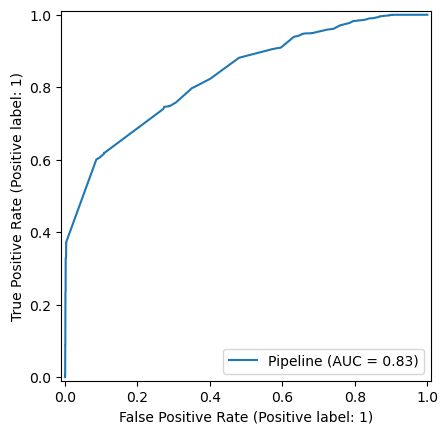

In [ ]:
RocCurveDisplay.from_estimator(gscv.best_estimator_,X_test, y_test)

**Intepretasi**

- AUC (Area Under the Curve) yang tercantum sebesar 0.83 menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif (>0.50). Nilai AUC 0.83 berarti model dapat membedakan antara kelas dengan tingkat akurasi yang cukup tinggi (sebesar 83%). Nilai AUC yang lebih tinggi dari 0.8 dianggap sebagai model dengan kinerja yang sangat baik.
Secara keseluruhan, ROC curve ini menunjukkan bahwa model yang digunakan memiliki performa yang baik dalam mengklasifikasikan data dengan tingkat kesalahan yang rendah (false positives) dan kemampuan yang baik untuk mendeteksi kelas positif.

# 6. Treshold

In [ ]:
model=best
model.fit(X_train,y_train)

th_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in th_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=fbeta_score(y_test,y_pred,beta=2)
    score_list.append(score_temp)

th_f2 = pd.DataFrame({
    'th_value':th_value,
    "f2_score":score_list
})

th_f2=th_f2.sort_values("f2_score",ascending=False)

In [ ]:
th_f2

,th_value,f2_score
25,0.26,0.778543
26,0.27,0.777978
24,0.25,0.777742
27,0.28,0.777196
23,0.24,0.773940
...,...,...
96,0.97,0.379011
93,0.94,0.378997
94,0.95,0.378997
95,0.96,0.378997


In [ ]:
th_f2.head(1)["th_value"].values

array([0.26])

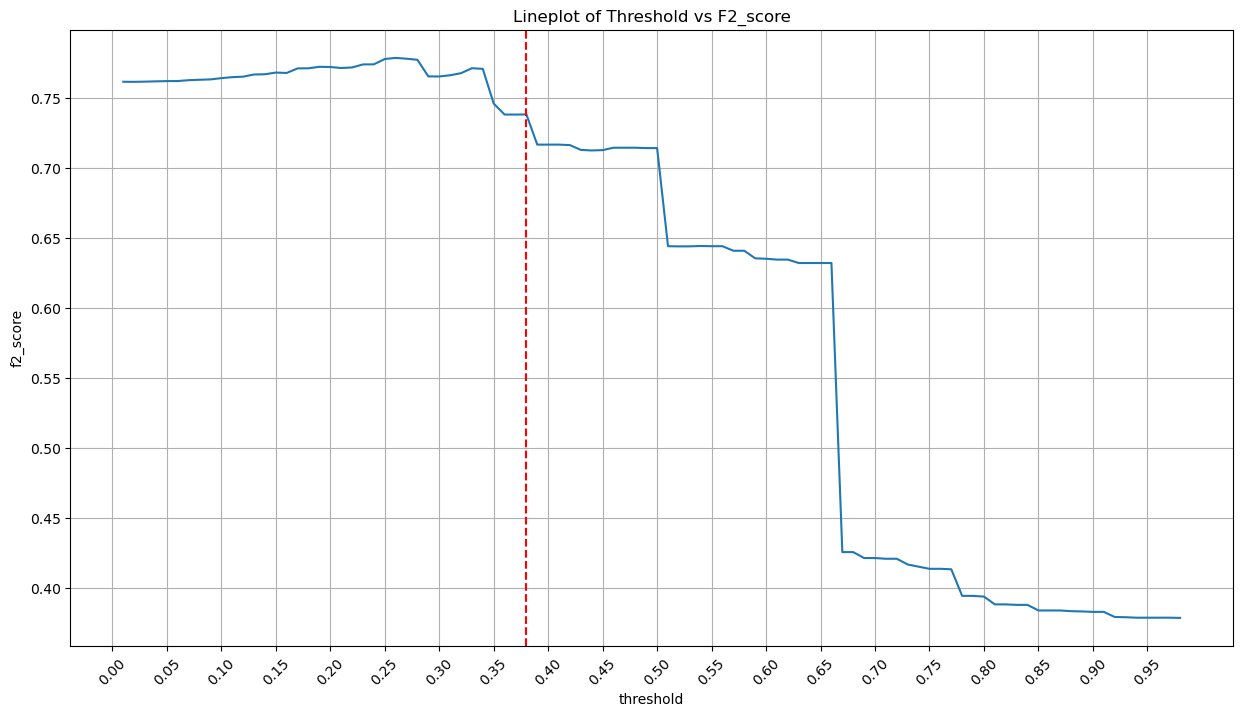

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.ylabel("f2_score")
plt.xlabel("threshold")
plt.title("Lineplot of Threshold vs F2_score")
plt.axvline(x=.38, linestyle='--',color='red')
plt.show()

**Insight**

- Model bekerja paling baik dengan threshold sekitar 0.38-0.40, yang memberikan keseimbangan optimal antara recall dan presisi. Menggunakan threshold lebih tinggi dari ini akan mengurangi kemampuan model dalam mendeteksi kasus positif yang benar, meskipun presisinya sedikit meningkat.

In [ ]:
y_prob=model.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>.38,1,0)

In [ ]:
th_f2[th_f2['th_value'] == .5]

,th_value,f2_score
49,0.5,0.714174


**Insight**
- Berdasarkan F2-score pada threshold = 0.5, nilai F2-score tercatat 0.71, yang menunjukkan bahwa dengan threshold tersebut model memiliki performa yang cukup baik dalam menyeimbangkan presisi dan recall.

In [ ]:
final_model_actual_pred_y = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
final_model_actual_pred_y 

,actual,pred
30227,1,1
67403,0,1
67999,0,0
66312,0,1
50257,0,0
...,...,...
57031,0,1
70231,0,0
47073,1,1
35760,1,1


In [ ]:
confusion_matrix_final= final_model_actual_pred_y.groupby("actual")["pred"].value_counts().reset_index()
confusion_matrix_final

,actual,pred,count
0,0,0,6877
1,0,1,3724
2,1,1,4881
3,1,0,1233


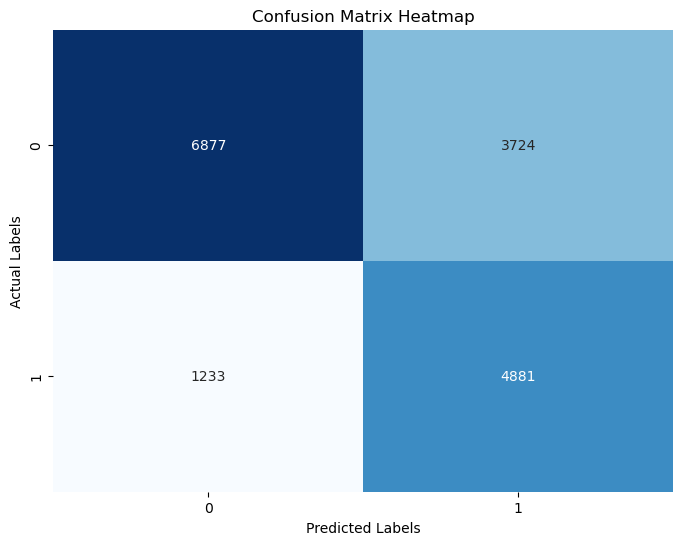

In [ ]:
#  Pivot table untuk menghasilkan format confusion matrix
conf_matrix = confusion_matrix_final.pivot(index='actual', columns='pred', values='count').fillna(0)

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

# Menambahkan judul dan label
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Tampilkan plot
plt.show()

**Interpretasi:**

- True Negatives (TN) = 6877:

Model berhasil memprediksi dengan benar bahwa 6877 observasi termasuk dalam kelas negatif (misalnya, tidak terjadi pembatalan) dan model benar dalam prediksi tersebut.

- False Positives (FP) = 3724:

Model salah mengklasifikasikan 3724 observasi yang sebenarnya negatif sebagai positif (misalnya, memprediksi pembatalan yang sebenarnya tidak terjadi). Ini bisa berisiko bagi bisnis karena alokasi sumber daya yang tidak perlu untuk tamu yang tidak membatalkan.

- False Negatives (FN) = 1233:

Model salah mengklasifikasikan 1233 observasi yang sebenarnya positif sebagai negatif (misalnya, gagal memprediksi pembatalan yang sebenarnya terjadi). Ini dapat menyebabkan hilangnya kesempatan untuk mengisi kamar yang kosong karena pembatalan yang tidak terdeteksi.

- True Positives (TP) = 4881:

Model berhasil memprediksi dengan benar bahwa 4881 observasi adalah pembatalan yang terjadi, yang memungkinkan hotel untuk mengambil tindakan lebih awal untuk mengelola inventaris dan sumber daya.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74     10601
           1       0.57      0.80      0.66      6114

    accuracy                           0.70     16715
   macro avg       0.71      0.72      0.70     16715
weighted avg       0.75      0.70      0.71     16715



In [ ]:
pd.DataFrame(y_pred).value_counts()

0
1    8605
0    8110
Name: count, dtype: int64

In [ ]:
print(fbeta_score(y_test,y_pred,beta=2))

0.7381809382656302


Nilai output dari kode ini adalah 0.7381, yang berarti bahwa model memiliki performa yang cukup baik dalam menyeimbangkan precision dan recall dengan lebih menekankan pada recall untuk mendeteksi lebih banyak kasus positif, dengan sedikit penurunan presisi.

# 7. Feature Importance

In [ ]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

,num__previous_cancellations,num__booking_changes,num__required_car_parking_spaces,num__total_of_special_requests,num__days_in_waiting_list,cat__market_segment_Complementary,cat__market_segment_Corporate,cat__market_segment_Direct,cat__market_segment_Groups,cat__market_segment_Offline TA/TO,cat__market_segment_Online TA,cat__market_segment_Undefined,cat__deposit_type_Non Refund,cat__deposit_type_Refundable,cat__customer_type_Group,cat__customer_type_Transient,cat__customer_type_Transient-Party,cat__reserved_room_type_B,cat__reserved_room_type_C,cat__reserved_room_type_D,cat__reserved_room_type_E,cat__reserved_room_type_F,cat__reserved_room_type_G,cat__reserved_room_type_H,cat__reserved_room_type_L,cat__reserved_room_type_P
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66853,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66854,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_estimator = best_estimator.named_steps['classifier']

In [ ]:
selected_features = best_estimator.named_steps['feature_selection'].get_support(indices=True)
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

In [ ]:
test = feature_names[selected_features]

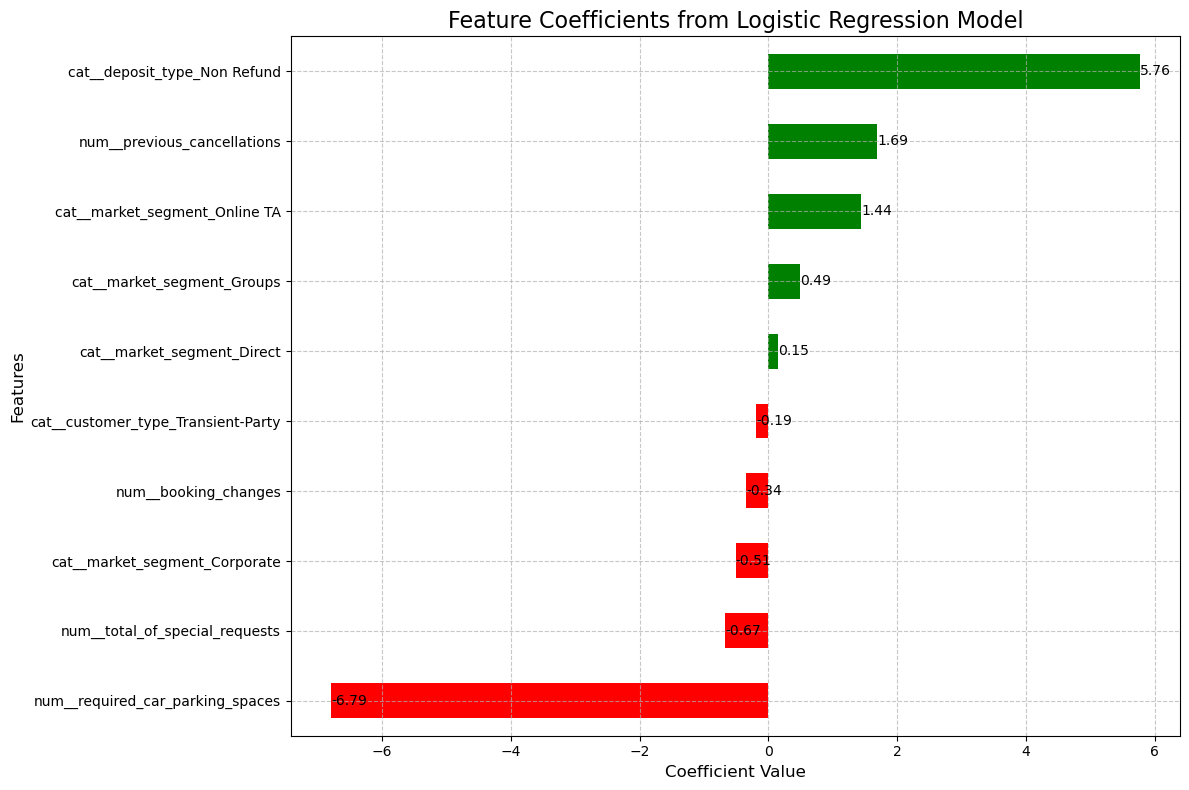

In [ ]:
model_coef = pd.Series(final_estimator.coef_[0], index=test).sort_values()
model_coef

# Plot the coefficients (which represent feature importance for logistic regression)
plt.figure(figsize=(10, 6))

# Bar plot dengan pewarnaan berbeda untuk koefisien positif dan negatif
colors = ['red' if val < 0 else 'green' for val in model_coef]

ax = model_coef.plot(kind='barh', color=colors, title='Feature Coefficients (Logistic Regression)', figsize=(12, 8))

# Menambahkan grid untuk memudahkan pembacaan
ax.grid(True, linestyle='--', alpha=0.7)

# Mengatur label agar lebih mudah dibaca
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_ylabel('Features', fontsize=12)

# Memutar label fitur di sumbu Y untuk keterbacaan yang lebih baik
plt.yticks(rotation=0)

# Menambahkan anotasi ke setiap bar dengan nilai koefisien
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # posisi x (di akhir bar)
            i.get_y() + i.get_height() / 2,  # posisi y (tengah bar)
            f'{i.get_width():.2f}',  # teks yang ditampilkan (nilai koefisien)
            ha='left',  # perataan horizontal (perata kiri)
            va='center',  # perataan vertikal (perata tengah)
            fontsize=10)  # ukuran font

# Menampilkan plot
plt.title('Feature Coefficients from Logistic Regression Model', fontsize=16)
plt.tight_layout()  # Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.show()

**Insight**

- Fitur yang memiliki koefisien positif yang besar, seperti cat__deposit_type_Non Refund (5.76) dan num_previous_cancellations (1.69), memiliki pengaruh besar terhadap keputusan model, yang berarti bahwa semakin besar nilai fitur ini, semakin besar kemungkinan terjadinya pembatalan. 

- Sebaliknya, fitur dengan koefisien negatif yang besar, seperti num_required_car_parking_spaces (-6.79), menunjukkan bahwa semakin besar nilai fitur ini, semakin rendah kemungkinan terjadinya pembatalan.

## 8. Rule Based vs Model Based

**Mengacu kepada jurnal, ditemukan tiga aturan yang membuat hotel memprediksi bahwa seorang tamu akan membatalkan pesanannya:**

- `Non- refundable Deposit` dan `previous cancellation`: Kombinasi dari `non refundable deposit` dan `previous cancelation` 3 kali atau lebih membuat hotel memprediksi tamu akan cancel booking. Meskipun deposit non-refundable umumnya digunakan untuk mengurangi pembatalan, beberapa tamu merasa lebih bebas untuk membatalkan setelah mereka membayar deposit, karena mereka merasa sudah "membayar harga" untuk melakukan perubahan dalam rencana perjalanan mereka. Ketika, `non refundable` dikombinasikan dengan `previous cancellation >= 3` maka tamu dengan perilaku ini terindikasi akan cancel booking karena sudah terbiasa melakukan pembatalan meskipun depositnya `non-refundable`, karena mereka memiliki pola perilaku tersebut.
(sumber: https://www.researchgate.net/publication/363371503_Comparison_and_Analysis_of_Machine_Learning_Models_to_Predict_Hotel_Booking_Cancellation)


- `days_in_waiting_list`: Waktu tunggu menjadi salah satu indikasi penting, karena semakin lama tamu menunggu untuk mendapatkan kamar, maka semakin besar juga faktor eksternal seperti berubahnya jadwal dan rencana tamu, atau ketersediaan biaya untuk tetap akan membooking kamar. Berdasarkan riset kualitatif, waktu yang lebih dari satu minggu menjadi acuan untuk hotel memprediksi tamu akan membatalkan booking. 
(sumber: https://e-conf.usd.ac.id/index.php/icebmr/icebmr2023/paper/view/3281/550#:~:text=However%2C%20it%20is%20not%20just,(Johnson%26%20Anderson%2C2020).)

- `total_of_special_requests` dan `required_car_parking_spaces`: Tidak adanya permintaan khusus bisa menjadi indikator bahwa tamu tersebut tidak sepenuhnya berkomitmen pada pemesanan mereka. Jika tamu tidak memiliki harapan atau kebutuhan khusus (seperti permintaan kamar tertentu, fasilitas ekstra, atau layanan khusus), mereka lebih cenderung untuk membatalkan jika ada faktor ketidakpastian lain yang mempengaruhi perjalanan mereka. Untuk permintaan parkir, tamu yang tidak membutuhkan tempat parkir mobil terindikasi tidak berencana untuk membawa kendaraan mereka ke hotel, yang dapat menunjukkan bahwa mereka tidak terlalu yakin untuk pergi ke hotel tersebut. Hal ini dapat menjadi indikator bahwa keputusan booking masih terbuka dan belum sepenuhnya yakin akan booking.
(sumber: https://arxiv.org/abs/2410.16406)

In [ ]:
X_test_rule_based

,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,market_segment,deposit_type,customer_type,reserved_room_type,days_in_waiting_list,predicted_cancel
30227,0,0,0,0,Online TA,No Deposit,Transient,A,0,1
67403,0,0,0,0,Online TA,No Deposit,Transient,D,0,1
67999,0,0,1,1,Offline TA/TO,No Deposit,Transient,A,0,0
66312,0,0,0,1,Online TA,No Deposit,Transient,D,0,0
50257,0,0,0,2,Online TA,No Deposit,Transient-Party,B,0,0
...,...,...,...,...,...,...,...,...,...,...
57031,0,0,0,0,Online TA,No Deposit,Transient-Party,A,0,1
70231,0,0,1,1,Direct,No Deposit,Transient,C,0,0
47073,0,0,0,0,Corporate,Non Refund,Transient,A,0,1
35760,0,0,0,0,Offline TA/TO,Non Refund,Transient,A,0,1


In [ ]:
X_test_rule_based = X_test.copy()
# Rule-based prediction (tanpa country)
def rule_based_prediction(row):
    # Rule 1: Deposit non-refundable & ≥3 pembatalan sebelumnya (referensi [1])
    if row['deposit_type'] == 'Non-Refundable' and row['previous_cancellations'] >= 3:
        return 1
    # Rule 2: Menunggu >7 hari (referensi [2])
    elif row['days_in_waiting_list'] > 7:
        return 1
    # Rule 3: Tidak ada permintaan khusus & tidak butuh parkir mobil (referensi [3])
    elif row['total_of_special_requests'] == 0 and row['required_car_parking_spaces'] == 0:
        return 1
    else:
        return 0

# Tambahkan kolom prediksi
X_test_rule_based['predicted_cancel'] = X_test_rule_based.apply(rule_based_prediction, axis=1)

**Sesuai dengan kondisi yang telah dijelaskan pada awal bab ini, rules diaplikasikan pada data test sehingga mendapatkan gambaran bagaimana performa hasil rule based**

In [ ]:
print(classification_report(X_test_rule_based['predicted_cancel'], y_test))

              precision    recall  f1-score   support

           0       0.55      0.80      0.65      7354
           1       0.76      0.50      0.60      9361

    accuracy                           0.63     16715
   macro avg       0.66      0.65      0.63     16715
weighted avg       0.67      0.63      0.62     16715



In [ ]:
print(fbeta_score(X_test_rule_based['predicted_cancel'], y_test, beta=2))

0.5322788006795537


In [ ]:
print(confusion_matrix(X_test_rule_based['predicted_cancel'], y_test))

[[5877 1477]
 [4724 4637]]


**Intepretasi rule based model**

**Classification Report**
- Precision: Model lebih baik dalam memprediksi pemesanan yang dibatalkan (76%) dibandingkan yang tidak dibatalkan (55%).
Recall: Model lebih baik mengidentifikasi pemesanan yang tidak dibatalkan (80%), tapi kurang dalam mengidentifikasi pemesanan yang dibatalkan (50%).
- F1-score: Nilai F1 untuk kelas 0 (0.65) lebih tinggi dibandingkan kelas 1 (0.60), menunjukkan keseimbangan yang lebih baik untuk kelas 0.
Accuracy: 63%, artinya model benar memprediksi 63% dari data.
- F-beta Score
- F-beta Score: 0.53 dengan beta=2, menunjukkan model cukup baik dalam menangkap pembatalan (lebih mengutamakan recall).

**Confusion Matrix**
- True Negatives (5877): Prediksi benar bahwa pemesanan tidak dibatalkan.
- True Positives (4637): Prediksi benar bahwa pemesanan dibatalkan.
- False Positives (1477): Prediksi salah bahwa pemesanan tidak dibatalkan.
- False Negatives (4724): Prediksi salah bahwa pemesanan tidak dibatalkan.

**Kesimpulan:**
- Model memiliki akurasi 63%, dengan kemampuan lebih baik dalam memprediksi pemesanan yang tidak dibatalkan (kelas 0) daripada yang dibatalkan (kelas 1).

In [373]:
# Parameter input
total_bookings = len(y_test)  # Total booking per bulan
fn_cost_per_booking = 176  # Biaya kerugian per FN (False Negative)
fp_cost_per_booking = 88  # Biaya kerugian per FP (False Positive)

# Hitung confusion matrix
cm = confusion_matrix(y_test, X_test_rule_based['predicted_cancel'])
tn, fp, fn, tp = cm.ravel()

# Hitung kerugian
fn_loss = fn * fn_cost_per_booking
fp_loss = fp * fp_cost_per_booking
total_loss = fn_loss + fp_loss

# Output hasil
print("===== Kalkulasi Kerugian Rule Base =====")
print(f"Total Bookings: {total_bookings}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Kerugian FN: ${fn_loss:,.2f}")
print(f"Kerugian FP: ${fp_loss:,.2f}")
print(f"Total Kerugian/Bulan: ${total_loss:,.2f}")

===== Kalkulasi Kerugian Rule Base =====
Total Bookings: 16715
True Positives (TP): 4637
True Negatives (TN): 5877
False Positives (FP): 4724
False Negatives (FN): 1477
Kerugian FN: $259,952.00
Kerugian FP: $415,712.00
Total Kerugian/Bulan: $675,664.00


In [374]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Hitung kerugian
fn_loss = fn * fn_cost_per_booking
fp_loss = fp * fp_cost_per_booking
total_loss = fn_loss + fp_loss

# Output hasil
print("===== Kalkulasi Kerugian Model Based =====")
print(f"Total Bookings: {total_bookings}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Kerugian FN: ${fn_loss:,.2f}")
print(f"Kerugian FP: ${fp_loss:,.2f}")
print(f"Total Kerugian/Bulan: ${total_loss:,.2f}")

===== Kalkulasi Kerugian Model Based =====
Total Bookings: 16715
True Positives (TP): 4881
True Negatives (TN): 6877
False Positives (FP): 3724
False Negatives (FN): 1233
Kerugian FN: $217,008.00
Kerugian FP: $327,712.00
Total Kerugian/Bulan: $544,720.00


**Perhitungan**

Berdasarkan sumber dari jurnal (https://www.sciencedirect.com/science/article/pii/S2352340918315191), ditemukan bahwa pada data ini terdapat banyak nilai unik (162 negara) dan sebagian besar data berasal dari Portugal (40,79%). Maka rata rata harga kamar hotel di portugal dijadikan acuan yaitu $88. Dalam pembobotanya false negative dibobotkan 2 kali lebih besar dari false positive cost of booking (Kasus Overbooking).

(sumber: https://www.researchgate.net/publication/363371503_Comparison_and_Analysis_of_Machine_Learning_Models_to_Predict_Hotel_Booking_Cancellation)

**Intepretasi perbandingan model**

**Kalkulasi Kerugian Rule-Based:**
- Total Kerugian per Bulan: $675,664
- Kerugian FN: $259,952 (karena pemesanan yang dibatalkan tidak terdeteksi).
- Kerugian FP: $415,712 (karena overbooking atau prediksi pemesanan dibatalkan yang salah).

**Kalkulasi Kerugian Model-Based:**
- Total Kerugian per Bulan: $544,720
- Kerugian FN: $217,008 (lebih rendah dibandingkan Rule-Based).
- Kerugian FP: $327,712 (lebih rendah dibandingkan Rule-Based).

**Model-Based menunjukkan penurunan kerugian sebesar 19.4% dibandingkan dengan Rule-Based.
Penurunan kerugian terjadi karena model lebih baik dalam mengidentifikasi pemesanan yang dibatalkan (FN) dan mengurangi jumlah False Positives (FP), yang menyebabkan overbooking.
Dengan model-based, kerugian total lebih rendah, terutama pada kerugian yang terkait dengan False Positives dan False Negatives, yang meningkatkan efisiensi dan pendapatan.**

Kesimpulan:
**Model-Based lebih baik dalam meminimalkan kerugian, menghasilkan penurunan kerugian sebesar 19.4%** dibandingkan dengan Rule-Based, sehingga lebih efisien untuk digunakan dalam prediksi pemesanan dan pembatalan.



# 9. Kesimpulan
## Kesimpulan

- Penelitian ini bertujuan untuk mengembangkan model prediksi menggunakan machine learning untuk memprediksi kemungkinan pembatalan booking oleh pelanggan. Dengan menggunakan data historis yang mengandung berbagai faktor seperti karakteristik pelanggan dan riwayat booking, model yang dikembangkan dapat memberikan wawasan yang lebih baik kepada perusahaan dalam mengelola pemesanan dan pembatalan.

- Dari data csv, terdapat data kosong pada kolom country. Berdasarkan referensi jurnal dan pertimbangan analisis, kolom country di drop. Selain itu, juga terdapat data duplikat sebanyak 87% dari keseluruhan data. Namun, karena tidak terdapat nomor identifikasi unik seperti tanggal atau ID, maka data duplikat tidak dihilangkan.

- Model terbaik yang terpilih adalah LogisticRegression dengan f2-score sebesar 0.73, terpilihnya LogisticRegression menjadi model terbaik melalu prosess modelling, tuning, dan pengaturan treshold.

- Fitur yang paling berpengaruh terhadap pembatalan booking adalah cat__deposit_type_Non Refund (5.76) dan num_previous_cancellations (1.69), dimana semakin besar fitur tersebut maka semakin besar pula kemungkinan pembatalan booking.

- Hasil analisis menunjukkan bahwa model prediktif terbaik dapat membantu perusahaan mengidentifikasi pemesanan yang berisiko dibatalkan, yang pada gilirannya dapat meminimalkan kerugian finansial sebesar 19% dibandingkan dengan menggunakan rule based yang diambil dari beberapa jurnal..

- Ke depannya, untuk meningkatkan akurasi prediksi, perusahaan dapat terus memperbaharui data yang digunakan dan mengintegrasikan model dengan sistem operasional lainnya. Selain itu, pendekatan berbasis data ini dapat diperluas untuk memprediksi faktor-faktor lain yang mempengaruhi kepuasan pelanggan, guna menciptakan pengalaman pelanggan yang lebih optimal.



# 10. Rekomendasi
## 10.1 Rekomendasi bisnis
- Optimasi Sistem Pemesanan dengan Menggunakan Model Prediktif

Tindakan: Implementasikan model prediksi pembatalan untuk menganalisis kemungkinan pemesanan yang akan dibatalkan. Dengan memanfaatkan F2-score, yang lebih menekankan pada recall, hotel dapat memprediksi lebih akurat pemesanan yang berisiko dibatalkan.
Manfaat: Mengurangi False Negative dan memastikan hotel dapat mengantisipasi pembatalan, sehingga mengurangi potensi kamar kosong dan memaksimalkan pendapatan.

- Pengelolaan Deposit dan Kebijakan Pembatalan

Tindakan: Untuk pemesanan yang berisiko tinggi, terapkan kebijakan cancellation fee atau denda pembatalan kamar. Dengan demikian, tamu yang sudah melakukan deposit akan lebih cenderung untuk tetap melaksanakan pemesanan.
Manfaat: Membantu mengurangi tingkat pembatalan tanpa mengorbankan pengalaman pelanggan dan menjaga aliran pendapatan tetap stabil.

- Peningkatan Layanan dan Fasilitas yang Dipesan

Tindakan: Analisis permintaan khusus dari tamu untuk mengidentifikasi preferensi yang lebih mendalam dan menyediakan fasilitas tambahan, seperti tempat parkir atau permintaan khusus. Fokus pada pemesanan dengan permintaan khusus untuk memastikan tingkat kepuasan pelanggan yang lebih tinggi.
Manfaat: Dengan memahami permintaan dan kebiasaan tamu, hotel dapat menyesuaikan layanan mereka, yang dapat mengurangi kemungkinan pembatalan oleh tamu yang merasa dilayani lebih baik.

- Pengelolaan Kamar Kosong dengan Pendekatan Dinamis

Tindakan: Gunakan prediksi pembatalan untuk overbook atau menawarkan kamar dengan harga diskon lebih awal untuk menghindari kamar kosong yang tidak terisi.
Manfaat: Mengoptimalkan penggunaan kamar dan meminimalkan kerugian pendapatan dari kamar kosong.



## 10.2. Rekomendasi Model
- **Menggunakan Fitur Tambahan yang Lebih Mendalam**

Tindakan: Perluas fitur yang digunakan dalam model dengan informasi lebih detail, seperti waktu pemesanan, sumber pemesanan (online/offline), status pelanggan (new/repeat customer), dan jumlah tamu. Data tambahan ini bisa memberikan wawasan lebih dalam mengenai faktor yang mempengaruhi pembatalan.

Manfaat: Memperkenalkan lebih banyak fitur yang relevan akan meningkatkan akurasi prediksi dan model menjadi lebih sensitif terhadap pola yang lebih halus dalam data.

-**Peningkatan Kualitas Data**

Tindakan: Pastikan data yang digunakan dalam pelatihan bebas dari missing values dan outliers. Lakukan feature engineering untuk menciptakan fitur yang lebih bermakna, seperti rata-rata waktu tunggu atau jumlah pembatalan sebelumnya untuk setiap pelanggan.

Manfaat: Data yang bersih dan fitur yang dipilih dengan baik akan memberikan dasar yang lebih kuat untuk model, menghasilkan prediksi yang lebih akurat.

-**Monitor dan Update Model Secara Berkala**

Tindakan: Implementasikan proses pemantauan untuk memeriksa performa model di dunia nyata, dan lakukan pembaruan secara berkala menggunakan data baru atau jika ada perubahan pola perilaku pelanggan.

Manfaat: Dengan terus memperbarui model, hotel dapat menjaga tingkat akurasi dan relevansi model prediksi dalam menghadapi dinamika pasar dan perubahan perilaku pelanggan.

# 11. Limitasi Model
| Kriteria                       | Rentang Nilai               | Nilai yang Diperbolehkan                                                                                   |
|---------------------------------|-----------------------------|------------------------------------------------------------------------------------------------------------|
| Previous Cancellations         | 0 - 26                      | -                                                                                                          |
| Booking Changes                | 0 - 21                      | -                                                                                                          |
| Required Car Parking Spaces   | 0 - 8                       | -                                                                                                          |
| Total of Special Requests     | 0 - 5                       | -                                                                                                          |
| Days in Waiting List          | 0 - 391                     | -                                                                                                          |
| Market Segment                 | -                           | Corporate, Offline TA/TO, Direct, Groups, Online TA, Complementary, Aviation, Undefined                   |
| Deposit Type                   | -                           | No Deposit, Non Refund, Refundable                                                                        |
| Customer Type                  | -                           | Transient-Party, Transient, Contract, Group                                                                |
| Reserved Room Type             | -                           | A, G, E, D, B, C, F, H, P, L                                                                              |


- Hanya Memodelkan Hubungan Linear
Logistic Regression hanya dapat menangkap hubungan linear antara fitur input dan probabilitas output. Jika data memiliki hubungan non-linear yang kompleks, model ini mungkin tidak memberikan hasil yang optimal tanpa transformasi fitur atau penggunaan algoritma yang lebih canggih seperti Decision Trees atau Random Forests.

- Performa Terbatas pada Masalah Klasifikasi Sederhana
Meskipun efektif untuk masalah klasifikasi biner, Logistic Regression cenderung kurang optimal untuk masalah dengan multiple classes (kecuali dengan penggunaan teknik seperti One-vs-Rest atau Multinomial Logistic Regression).

- Keterbatasan dalam Pembelajaran dari Data Non-Linear
Jika pola dalam data sangat kompleks dan tidak dapat dijelaskan dengan fitur linier, maka model ini mungkin tidak cukup kuat dibandingkan dengan model berbasis pohon keputusan atau neural networks yang lebih fleksibel.

# 12. Fit Final Model

In [376]:
best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests',
                                                   'days_in_waiting_list']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_...
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(l1_ratio=0.5,
                                                              penalty='elasticnet',
                                                              solver='saga'),
                                 max_features=25, threshold='mean')),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42, solver='liblinear'))])

In [377]:
data_streamlit_x= pd.concat([X_train, X_test])
data_streamlit_x

,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,market_segment,deposit_type,customer_type,reserved_room_type,days_in_waiting_list
64806,0,0,0,0,Corporate,No Deposit,Transient-Party,A,0
21093,0,0,0,1,Offline TA/TO,No Deposit,Transient-Party,A,0
22512,0,0,0,1,Direct,No Deposit,Transient,G,0
31306,0,0,1,1,Direct,No Deposit,Transient,A,0
67920,0,0,0,0,Direct,No Deposit,Transient,E,0
...,...,...,...,...,...,...,...,...,...
57031,0,0,0,0,Online TA,No Deposit,Transient-Party,A,0
70231,0,0,1,1,Direct,No Deposit,Transient,C,0
47073,0,0,0,0,Corporate,Non Refund,Transient,A,0
35760,0,0,0,0,Offline TA/TO,Non Refund,Transient,A,0


In [378]:
data_streamlit_y= pd.concat([y_train, y_test])
data_streamlit_y

64806    0
21093    0
22512    0
31306    0
67920    0
        ..
57031    0
70231    0
47073    1
35760    1
79390    0
Name: is_canceled, Length: 83573, dtype: int64

In [379]:
best_estimator_streamlit= best
streamlit_1= best_estimator_streamlit.fit(data_streamlit_x, data_streamlit_y)


KeyboardInterrupt: 

In [ ]:
import pickle

In [ ]:
#Saving models

filename = 'Hotel_booking.sav'

## Uncomment code dibawah untuk saving file model

pickle.dump(streamlit_1,open(filename,'wb'))

In [ ]:
display(X_train.describe())

pd.set_option('display.max_colwidth', None)


columns = X_train.select_dtypes(exclude='number').columns
values = []
nunique_list = []
for i in columns:
    value = X_train[i].unique()
    nunique = X_train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,days_in_waiting_list
count,66858.000000,66858.000000,66858.000000,66858.000000,66858.000000
mean,0.085091,0.220677,0.063119,0.571046,2.305289
std,0.818597,0.643397,0.246113,0.793020,17.477862
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000
max,26.000000,21.000000,8.000000,5.000000,391.000000


,columns,values,nunique
0,market_segment,"[Corporate, Offline TA/TO, Direct, Groups, Online TA, Complementary, Aviation, Undefined]",8
1,deposit_type,"[No Deposit, Non Refund, Refundable]",3
2,customer_type,"[Transient-Party, Transient, Contract, Group]",4
3,reserved_room_type,"[A, G, E, D, B, C, F, H, P, L]",10


In [ ]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!streamlit run hotel-booking_demand.py

'streamlit' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!streamlit

'streamlit' is not recognized as an internal or external command,
operable program or batch file.
